# 입문자를 위한, 파이썬/R 데이터 분석

## Today's mission

- 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석
- 워드클라우드 : soynlp 라이브러리 활용 명사 추출

## 워드클라우드 : 다음뉴스 키워드 검색 및 텍스트 분석

참고 : 다음 뉴스 사이트 기사목록 크롤링 및 텍스트 분석

In [1]:
#!pip install konlpy
#!pip install wordcloud

- [KoNLPy를 위한 자바 설치](https://www.codeit.kr/tutorials/43/KoNLPy-%EC%84%A4%EC%B9%98%ED%95%98%EA%B8%B0-Windows)

In [2]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

- 검색어 및 검색페이지 수 입력

In [3]:
# 검색어 입력
keyword = input("검색어를 입력하세요.")

In [4]:
# 검색페이지 입력
lastpage = int(input("마지막 페이지 번호를 입력하세요."))

- 다음 뉴스 검색 : 상기 검색어 및 페이지수 활용

In [5]:
titleList = []

for i in range(1, lastpage+1, 1) :
    #url = f"https://search.naver.com/search.naver?where=news&sm=tab_jum&query={keyword}&start=[{i}]"
    url = f"https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q={keyword}&p={i}"
    print(url)
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    titles = soup.select("ul.c-list-basic")
    #subtitles = soup.select("a.elss.sub_tit")
    
    for title in titles : # titles에서 title
        titleText = title.text # title.text만 추출
        #print(titleText)
        titleList.append(titleText) # titleList에 추가
    
    time.sleep(3)

https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=아바타&p=1
https://search.daum.net/search?w=news&nil_search=btn&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=아바타&p=2


In [6]:
titleList[0]

'            게임톡   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기           3         로드나인 "뽑기는 아바타뿐이지만 천장이 좀 심하네"       - 무과금사탕 계정 신화 등급 아바타 합성에 성공한 BJ \'팡이요\' 스마일게이트 \'로드나인\'에 유료 확률형 아이템은 \'아바타 소환\'뿐이다. 수많은 과금 유저가 이를 칭찬했다. 하지만 천장 시스템의 높은 허들에는 비정상이라며 혀를 내둘렀다. 특정 프로모션...    2024.07.15                 머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기                 10분만에 버추얼아바타 뚝딱…렌지드, 시드 투자 유치       업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫폼 \'데이터랩\'에서 볼 수 있습니다.] /사진설명=렌지드 버추얼 아바타 모바일 영상편집툴 \'첼리\'를 운영하는 렌지드가 초기투자기관 더벤처스로부터 시드 투자를 유치했다고 11일 밝혔다. 투자금은...    2024.07.11                 중앙일보       개별문서메뉴  톡으로 바로 공유 공유하기                 타이태닉·아바타 할리우드 흥행신화…제작자 존 랜도 별세       영화 타이태닉과 아바타 시리즈의 제작자인 존 랜도(63)가 암 투병 중 세상을 떠났다. AP=연합뉴스 영화 타이태닉과 아바타 시리즈의 제작자인 존 랜도(63)가 세상을 떠났다. 6일(현지시간) AP통신과 미국 연예매체 버라이어티 등에 따르면 그간 암 투병을 해 온...    2024.07.07                  중앙일보   2024.07.08    ‘타이태닉’‘아바타’ 제작자 존 랜도 별세               연합뉴스   2024.07.07    \'할리우드 흥행신화\' 타이태닉·아바타 제작자 존 랜도 별세               일간스포츠   2024.07.07    ‘타이타닉’ ‘아바타’ 제작자 존 랜도, 암 투병

In [7]:
# 한글만 추출
def text_cleaning(text) :
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub('', text)
    return result

In [8]:
text_cleaning(titleList[0])

'            게임톡   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                    로드나인 뽑기는 아바타뿐이지만 천장이 좀 심하네        무과금사탕 계정 신화 등급 아바타 합성에 성공한  팡이요 스마일게이트 로드나인에 유료 확률형 아이템은 아바타 소환뿐이다 수많은 과금 유저가 이를 칭찬했다 하지만 천장 시스템의 높은 허들에는 비정상이라며 혀를 내둘렀다 특정 프로모션                     머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기                 분만에 버추얼아바타 뚝딱렌지드 시드 투자 유치       업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫폼 데이터랩에서 볼 수 있습니다 사진설명렌지드 버추얼 아바타 모바일 영상편집툴 첼리를 운영하는 렌지드가 초기투자기관 더벤처스로부터 시드 투자를 유치했다고 일 밝혔다 투자금은                     중앙일보       개별문서메뉴  톡으로 바로 공유 공유하기                 타이태닉아바타 할리우드 흥행신화제작자 존 랜도 별세       영화 타이태닉과 아바타 시리즈의 제작자인 존 랜도가 암 투병 중 세상을 떠났다 연합뉴스 영화 타이태닉과 아바타 시리즈의 제작자인 존 랜도가 세상을 떠났다 일현지시간 통신과 미국 연예매체 버라이어티 등에 따르면 그간 암 투병을 해 온                      중앙일보       타이태닉아바타 제작자 존 랜도 별세               연합뉴스       할리우드 흥행신화 타이태닉아바타 제작자 존 랜도 별세               일간스포츠       타이타닉 아바타 제작자 존 랜도 암 투병 끝 별세         더보기      이전 컨텐츠보기 다음 컨텐츠보기                티브이데일리   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                 아바타 프로듀서 존 랜도 암 투병 중 사망 할리웃  

- [map 과 lambda 참고](https://wikidocs.net/32#map)

In [9]:
# 전처리 : 한글만 추출
titleList = list(map(lambda x:text_cleaning(x), titleList))

In [10]:
titleList[0]

'            게임톡   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                    로드나인 뽑기는 아바타뿐이지만 천장이 좀 심하네        무과금사탕 계정 신화 등급 아바타 합성에 성공한  팡이요 스마일게이트 로드나인에 유료 확률형 아이템은 아바타 소환뿐이다 수많은 과금 유저가 이를 칭찬했다 하지만 천장 시스템의 높은 허들에는 비정상이라며 혀를 내둘렀다 특정 프로모션                     머니투데이       개별문서메뉴  톡으로 바로 공유 공유하기                 분만에 버추얼아바타 뚝딱렌지드 시드 투자 유치       업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫폼 데이터랩에서 볼 수 있습니다 사진설명렌지드 버추얼 아바타 모바일 영상편집툴 첼리를 운영하는 렌지드가 초기투자기관 더벤처스로부터 시드 투자를 유치했다고 일 밝혔다 투자금은                     중앙일보       개별문서메뉴  톡으로 바로 공유 공유하기                 타이태닉아바타 할리우드 흥행신화제작자 존 랜도 별세       영화 타이태닉과 아바타 시리즈의 제작자인 존 랜도가 암 투병 중 세상을 떠났다 연합뉴스 영화 타이태닉과 아바타 시리즈의 제작자인 존 랜도가 세상을 떠났다 일현지시간 통신과 미국 연예매체 버라이어티 등에 따르면 그간 암 투병을 해 온                      중앙일보       타이태닉아바타 제작자 존 랜도 별세               연합뉴스       할리우드 흥행신화 타이태닉아바타 제작자 존 랜도 별세               일간스포츠       타이타닉 아바타 제작자 존 랜도 암 투병 끝 별세         더보기      이전 컨텐츠보기 다음 컨텐츠보기                티브이데일리   언론사 픽     개별문서메뉴  톡으로 바로 공유 공유하기                 아바타 프로듀서 존 랜도 암 투병 중 사망 할리웃  

- 텍스트 전처리 : 명사의 빈도수 계산

In [11]:
# 텍스트 전처리
title_corpus = " ".join(titleList) # 말뭉치
nouns_tagger = Okt() # 명사 추출
nouns = nouns_tagger.nouns(title_corpus)

In [12]:
nouns[:10]

['게임', '톡', '언론사', '픽', '개별', '문서', '메뉴', '톡', '바로', '공유']

In [13]:
count = Counter(nouns) # 각 명사의 빈도수 계산

In [14]:
# 각 명사의 빈도수 계산
count

Counter({'게임': 6,
         '톡': 22,
         '언론사': 8,
         '픽': 8,
         '개별': 20,
         '문서': 23,
         '메뉴': 20,
         '바로': 20,
         '공유': 40,
         '로드': 2,
         '나인': 2,
         '뽑기': 1,
         '아바타': 60,
         '천장': 2,
         '좀': 1,
         '무': 1,
         '과금': 2,
         '사탕': 1,
         '계정': 1,
         '신화': 3,
         '등급': 1,
         '합성': 3,
         '이요': 1,
         '스마일게이트': 1,
         '유료': 1,
         '확률': 1,
         '아이템': 1,
         '소환': 2,
         '유저': 1,
         '칭찬': 1,
         '시스템': 1,
         '허들': 1,
         '비정상': 1,
         '며': 1,
         '혀': 1,
         '내': 1,
         '특정': 1,
         '프로모션': 1,
         '머니투데이': 1,
         '분만': 1,
         '버추': 5,
         '얼': 6,
         '뚝딱': 1,
         '렌': 3,
         '지드': 3,
         '시드': 2,
         '투자': 7,
         '유치': 1,
         '업': 1,
         '대한': 1,
         '기업': 6,
         '정보': 1,
         '유니콘': 1,
         '팩토리': 1,
         '빅데이터'

- 텍스트 전처리 : 불용어 처리

In [15]:
# 불용어처리명
remove_char_counter = Counter({x:count[x] for x in count if len(x) > 1})

# 불용어 텍스트 파일 경로
korean_stopwords_path = "data/stopwords-ko.txt"

# 불용어 로드
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

# 나무위키에서 추가한 불용어
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명',
                       '표기', '추가', '모든', '사용', '매우', '가장', '줄거리',
                       '요소', '상황', '편집', '틀', '경우', '때문', '모습',
                       '정도', '이후', '사실', '생각', '인물', '이름', '년월', '공유', 
                       '메뉴'] ##### 개별적 불용어 추가

# 불용어 추가
stopwords.extend(namu_wiki_stopwords)

# 불용어 처리
remove_char_counter = Counter({x:remove_char_counter[x] for x in remove_char_counter if x not in stopwords})

In [16]:
remove_char_counter

Counter({'게임': 6,
         '언론사': 8,
         '개별': 20,
         '로드': 2,
         '나인': 2,
         '뽑기': 1,
         '아바타': 60,
         '천장': 2,
         '과금': 2,
         '사탕': 1,
         '계정': 1,
         '신화': 3,
         '등급': 1,
         '합성': 3,
         '이요': 1,
         '스마일게이트': 1,
         '유료': 1,
         '확률': 1,
         '아이템': 1,
         '소환': 2,
         '유저': 1,
         '칭찬': 1,
         '시스템': 1,
         '허들': 1,
         '비정상': 1,
         '특정': 1,
         '프로모션': 1,
         '머니투데이': 1,
         '분만': 1,
         '버추': 5,
         '뚝딱': 1,
         '지드': 3,
         '시드': 2,
         '투자': 7,
         '유치': 1,
         '대한': 1,
         '기업': 6,
         '정보': 1,
         '유니콘': 1,
         '팩토리': 1,
         '빅데이터': 1,
         '플랫폼': 3,
         '데이터': 1,
         '사진': 5,
         '모바일': 4,
         '영상편집': 4,
         '첼리': 4,
         '운영': 2,
         '렌지드': 1,
         '초기': 2,
         '기관': 1,
         '더벤처스로': 1,
         '금은': 1,
         '중앙': 2,

- 텍스트 전처리 : 명사의 분석 대상 갯수 지정

In [17]:
# 빈도수 특정 명사의 갯수 지정
ranked_tags = remove_char_counter.most_common(50) # 빈도순 n개 단어

In [18]:
#ranked_tags

In [19]:
pd.DataFrame(ranked_tags)

,0,1
0,아바타,60
1,개별,20
2,후보,11
3,사망,10
4,보기,9
5,언론사,8
6,제작자,8
7,랜도,8
8,추억,8
9,투자,7


- 워드클라우드

In [20]:
####### [WordCloud 오류 해결]
# !pip install --upgrade pip
# !pip install --upgrade Pillow

In [21]:
#remove_char_counter

In [22]:
# from wordcloud import WordCloud

# # 폰트 경로 설정 (Mac용 기본 한글 폰트)
# font_path = '/System/Library/Fonts/Supplemental/AppleSDGothicNeo.ttc'

# # 워드클라우드 설정 및 생성
# wc = WordCloud(font_path=font_path, width=1200, height=500,
#                scale=4.0, max_font_size=600, background_color='white')
# gen = wc.generate_from_frequencies(remove_char_counter)

In [23]:
### 워드클라우드
wc = WordCloud(font_path='data/malgun.ttf', width=1200, height=500,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(remove_char_counter)

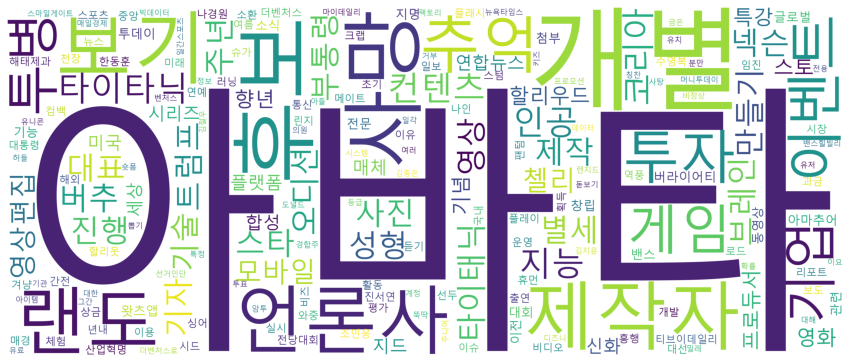

In [24]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
plt.savefig(f'data/daumNews_wc_{keyword}.png')

In [25]:
### 워드클라우드 상위 N개 대상
wc = WordCloud(font_path='data/malgun.ttf', width=1200, height=500,
               scale=4.0, max_font_size=600, background_color='white')
gen = wc.generate_from_frequencies(dict(ranked_tags))

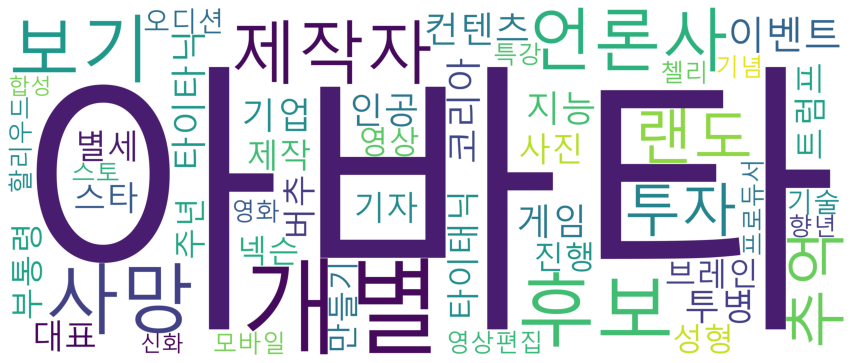

In [26]:
# 워드클라우드 그리기 및 파일로 저장
plt.figure(figsize=(15, 7))
plt.imshow(gen)
plt.axis('off')
plt.savefig(f'data/daumNews_wcN_{keyword}.png')